In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.join(os.path.abspath(''), '..'))
from scripts.gan import Generator

In [2]:
X = np.load('../data/X.npy')
X = torch.tensor(X, dtype=torch.float32)
y = np.load('../data/y.npy')
y = torch.tensor(y, dtype=torch.float32)
X = X[y == 0]
X = X.reshape(-1, 1, 1, 96)
X.shape

torch.Size([2440, 1, 1, 96])

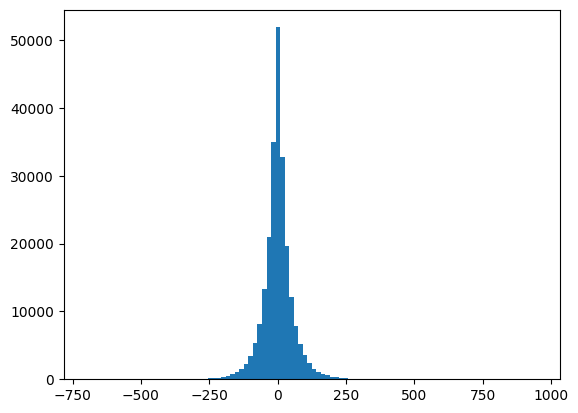

In [3]:
plt.hist(X.numpy().flatten(), bins=100);

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

G = Generator()
G.load_state_dict(torch.load('../models/best_generator_regime1.pth'))
G.to(device);

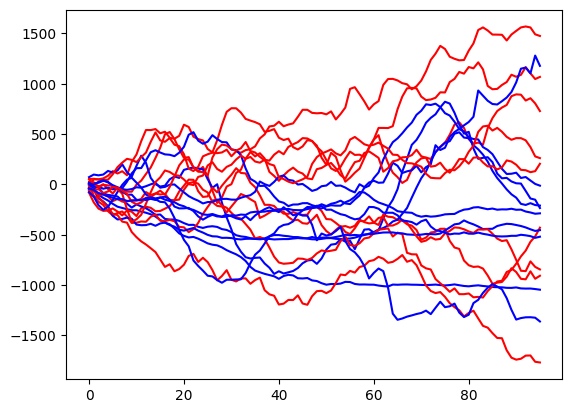

In [39]:
G.eval()
for _ in range(9):
    fake_data = G(torch.randn(1, 100, 1, 1, device=device))[:,:,:,25:-25].reshape(-1, 96).cpu() * X.std()
    idx = np.random.randint(0, len(X))
    idx_fake = np.random.randint(0, len(fake_data))
    plt.plot(fake_data[idx_fake].detach().numpy().cumsum(), color='red')
    plt.plot(X[idx, 0, 0].detach().numpy().cumsum(), color='blue')
plt.show()